<h3>Подключение необходимых библиотек</h3>

In [21]:
import joblib
import numpy as np
import pandas as pd
from lightgbm import Dataset, LGBMRegressor, early_stopping, plot_tree, train
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from evaluation import (
    evaluate_regression,
    plot_regression,
    residuals_histogram,
    calculate_importance_gains,
    plot_feature_importances,
)

<h3>Загрузка данных из CSV</h3>

In [9]:
df = pd.read_csv("diamonds2.csv")
columns_mapping = {
    "carat": "Карат",
    "cut": "Огранка",
    "color": "Цвет",
    "clarity": "Чистота",
    "depth": "Глубина",
    "table": "Площадка",
    "price": "Цена",
    "x": "Длина",
    "y": "Ширина",
    "z": "Высота",
}
df.rename(columns=columns_mapping, inplace=True)
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Удаление пропусков</h3>

In [10]:
df = df.dropna()
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Удаление дубликатов</h3>

In [11]:
df = df.drop_duplicates()
df

,Карат,Огранка,Цвет,Чистота,Глубина,Площадка,Цена,Длина,Ширина,Высота
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Удаление ненужных факторов</h3>

In [12]:
df = df.drop(columns=["Длина", "Ширина", "Высота", "Глубина", "Площадка"])
df

,Карат,Огранка,Цвет,Чистота,Цена
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335
...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757
53936,0.72,Good,D,SI1,2757
53937,0.70,Very Good,D,SI1,2757
53938,0.86,Premium,H,SI2,2757


<h3>Преобразуем типы данных для лучшего быстродействия</h3>

In [13]:
df = df.copy()
for column in df.select_dtypes(include=["float64", "int64"]):
    df[column] = df[column].astype("float32")

for column in df.select_dtypes(include="object"):
    df[column] = df[column].astype("category")

In [14]:
y = df["Цена"]
X = df.drop(columns=["Цена"])
X

,Карат,Огранка,Цвет,Чистота
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2
...,...,...,...,...
53935,0.72,Ideal,D,SI1
53936,0.72,Good,D,SI1
53937,0.70,Very Good,D,SI1
53938,0.86,Premium,H,SI2


<h3>Разбиение выборки на тренировочную, тестовую и валидационную</h3>

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, shuffle=True, test_size=0.2, random_state=1
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    shuffle=True,
    test_size=0.5,
    random_state=1,
)

<h3>Так как в целевой переменной есть выбросы, то нужно использовать <b>MAE</b> в качестве функции потерь.</h3>

<h3>Подбор гиперпараметров в попытке улучшить качество</h3>

In [16]:
categorical_features = X_train.select_dtypes(include="category").columns.to_list()
categorical_features

['Огранка', 'Цвет', 'Чистота']

In [17]:
train_data = Dataset(
    data=X_train, label=y_train, categorical_feature=categorical_features
)
val_data = Dataset(data=X_val, label=y_val, categorical_feature=categorical_features)

In [18]:
main_params = {
    "objective": "mae",
    "metric": "mae",
    "force_col_wise": "true",
    "random_state": 1,
    "verbose": -1,
    "bagging_freq": 1,
}

<h3>Подбираем стартовые n_estimators</h3>

In [19]:
model = train(
    main_params,
    train_data,
    num_boost_round=5_000,
    valid_sets=[val_data],
    callbacks=[early_stopping(50)],
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[442]	valid_0's l1: 276.083


<h3>Подбираем num_leaves</h3>

In [22]:
best_params = {"num_leaves": 1, "mae": 1_000}
for num_leaves in range(7, 50):
    model = LGBMRegressor(
        n_estimators=442,
        random_state=1,
        bagging_freq=1,
        n_jobs=-1,
        verbose=-1,
        objective="mae",
        num_leaves=num_leaves,
    )
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    metric = round(mean_absolute_error(y_val, y_pred_val))
    if metric < best_params["mae"]:
        best_params["num_leaves"] = num_leaves
        best_params["mae"] = metric

In [23]:
best_params

{'num_leaves': 43, 'mae': 272}

In [24]:
main_params["num_leaves"] = best_params["num_leaves"]
main_params

{'objective': 'mae',
 'metric': 'mae',
 'force_col_wise': 'true',
 'random_state': 1,
 'verbose': -1,
 'bagging_freq': 1,
 'num_leaves': 43}

<h3>Подбираем subsample и colsample_bytree</h3>

In [35]:
best_params = {"subsample": 0.4, "colsample_bytree": 0.4, "mae": 1_000}

for subsample in [i / 10 for i in range(4, 11)]:
    for colsample_bytree in [i / 10 for i in range(4, 11)]:
        model = LGBMRegressor(
            n_estimators=442,
            random_state=1,
            bagging_freq=1,
            n_jobs=-1,
            verbose=-1,
            objective="mae",
            num_leaves=43,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
        )
        model.fit(X_train, y_train)
        y_pred_val = model.predict(X_val)
        metric = round(mean_absolute_error(y_val, y_pred_val))

        if metric < best_params["mae"]:
            best_params["subsample"] = subsample
            best_params["colsample_bytree"] = colsample_bytree
            best_params["mae"] = metric

In [36]:
best_params

{'subsample': 0.8, 'colsample_bytree': 0.9, 'mae': 272}

In [37]:
main_params["subsample"] = best_params["subsample"]
main_params["colsample_bytree"] = best_params["colsample_bytree"]
main_params

{'objective': 'mae',
 'metric': 'mae',
 'force_col_wise': 'true',
 'random_state': 1,
 'verbose': -1,
 'bagging_freq': 1,
 'num_leaves': 43,
 'subsample': 0.8,
 'colsample_bytree': 0.9}

<h3>Обновляем n_estimators</h3>

In [38]:
model = train(
    main_params,
    train_data,
    num_boost_round=5_000,
    valid_sets=[val_data],
    callbacks=[early_stopping(50)],
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[454]	valid_0's l1: 272.079


<h3>Обучение новой модели</h3>

In [47]:
model_new = LGBMRegressor(
    n_jobs=-1,
    random_state=1,
    force_col_wise=True,
    importance_type="gain",
    objective="mae",
    n_estimators=454,
    num_leaves=43,
    subsample=0.8,
    colsample_bytree=0.9,
).fit(X_train, y_train)

In [48]:
y_pred_train = model.predict(X_train)
evaluate_regression(y_train, y_pred_train, len(X_train.columns))

RMSE равняется 517.057
MAE равняется 248.952
MAPE равняется 6.860 %
Adjusted R2 равняется 0.983


In [49]:
y_pred_val = model.predict(X_val)
evaluate_regression(y_val, y_pred_val, len(X_train.columns))

RMSE равняется 543.066
MAE равняется 272.079
MAPE равняется 7.228 %
Adjusted R2 равняется 0.981


<center><h3>Метрики качества новой модели </h3>
<table>
  <tr>
    <td></td>
    <td><b>Train</b></td>
    <td><b>Validation</b></td>
  </tr>
  <tr>
    <td><b>RMSE</b></td>
    <td>517.057</td>
    <td>543.066</td>
  </tr>
  <tr>
    <td><b>MAE</b></td>
    <td>248.952</td>
    <td>272.079</td>
  </tr>
  <tr>
    <td><b>MAPE (%)</b></td>
    <td>6.860</td>
    <td>7.228</td>
  </tr>
  <tr>
    <td><b>R<sup>2</sup><sub>adjusted</sub></b></td>
    <td>0.983</td>
    <td>0.981</td>
  </tr>
</table></center>

<h3>Показатели на обучающей и валидационной выборке не сильно отличаются, отсутствует переобучение. Подобрав n_estimators и num_leaves, удалось уменьшить MAPE до 7.2 % на валидационной выборке.</h3>

У базовой модели $\frac{MAE_{\text{val}}}{MAE_{\text{train}}} \approx 1.07$, а $\frac{RMSE_{\text{val}}}{RMSE_{\text{train}}} \approx 1.14$;

У новой модели $\frac{MAE_{\text{val}}}{MAE_{\text{train}}} \approx 1.03$, а $\frac{RMSE_{\text{val}}}{RMSE_{\text{train}}} \approx 1.03$.

У настроенной модели $\frac{MAE_{\text{val}}}{MAE_{\text{train}}} \approx 1.09$, а $\frac{RMSE_{\text{val}}}{RMSE_{\text{train}}} \approx 1.05$.

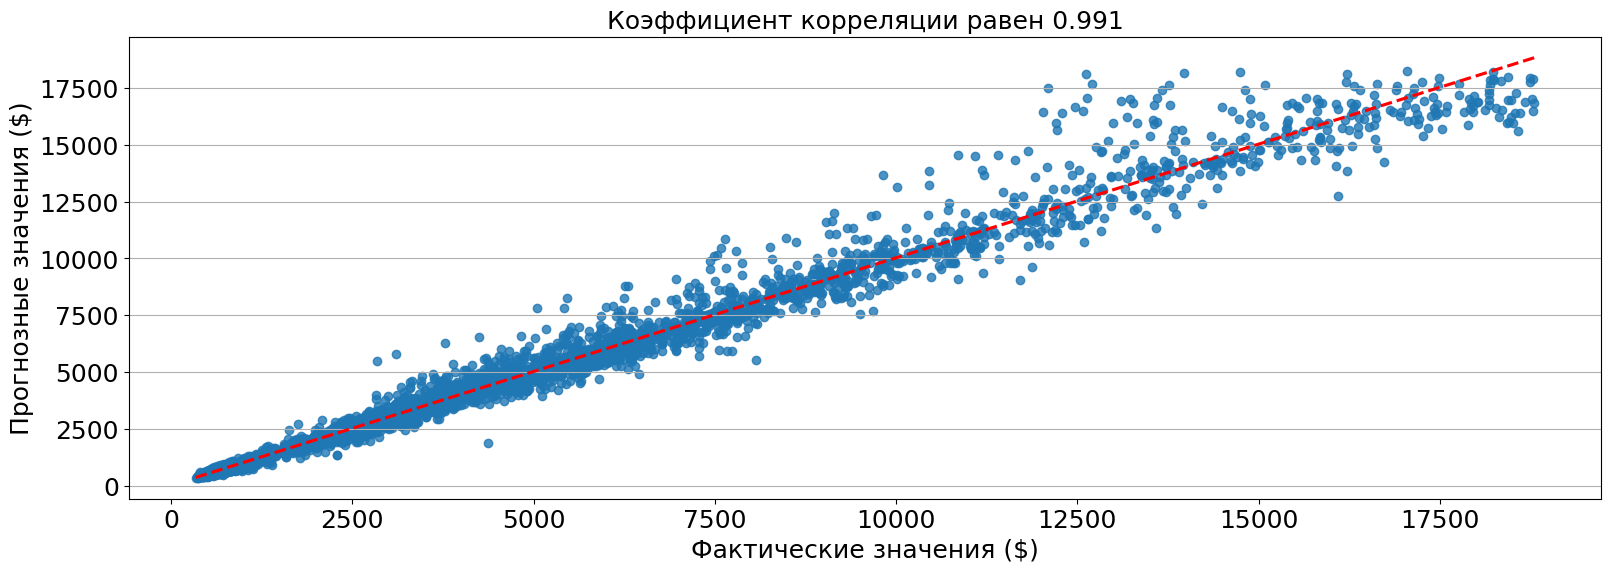

In [50]:
plot_regression(y_val.values, y_pred_val)

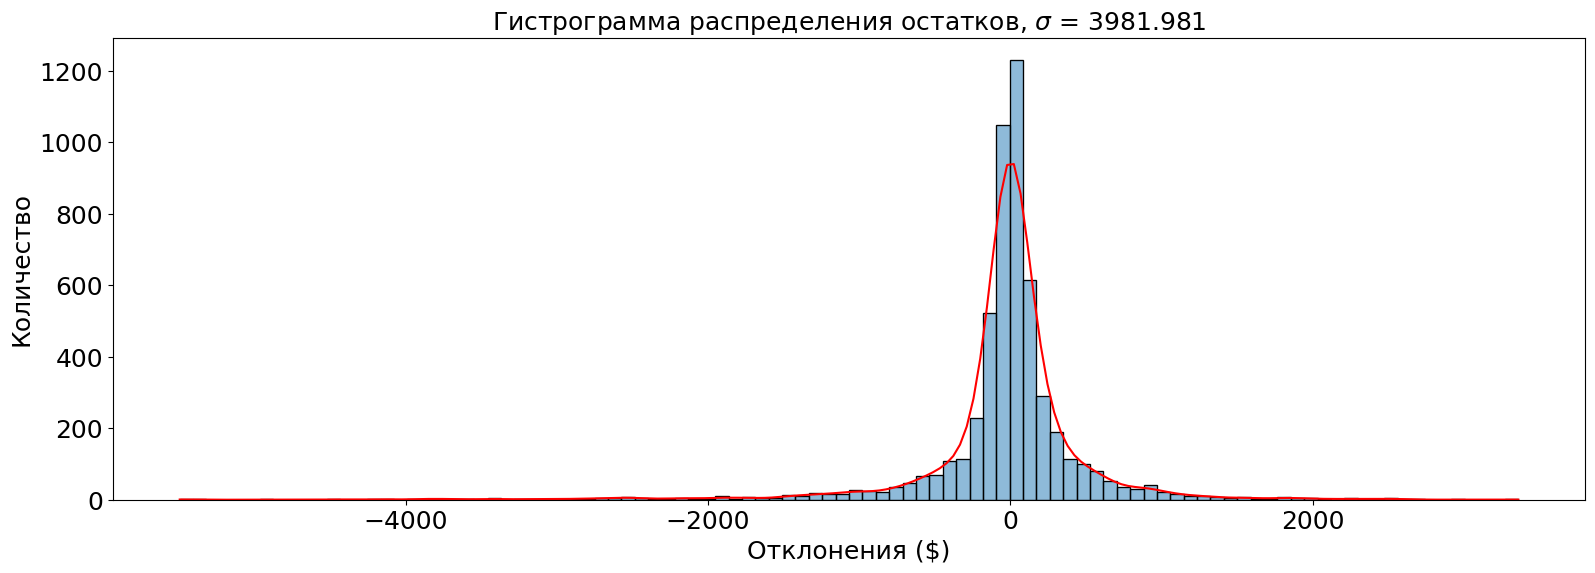

In [51]:
residuals_histogram(y_val, y_pred_val)

<h3>Судя по метрикам и графикам новая модель лучше справляется с прогнозированием. У нее еще больше значений в окрестности нуля. Было решено использовать ее в качестве итоговой.</h3>

<h3>Показатели на тестовой выборке</h3>

In [52]:
y_pred_test = model_new.predict(X_test)
evaluate_regression(y_test, y_pred_test, len(X_test.columns))

RMSE равняется 535.837
MAE равняется 267.931
MAPE равняется 7.388 %
Adjusted R2 равняется 0.981


<center><h3>Метрики качества итоговой модели</h3>
<table>
  <tr>
    <td></td>
    <td><b>Train</b></td>
    <td><b>Validation</b></td>
    <td><b>Test</b></td>
  </tr>
  <tr>
    <td><b>RMSE</b></td>
    <td>517.057</td>
    <td>543.066</td>
    <td>535.837</td>
  </tr>
  <tr>
    <td><b>MAE</b></td>
    <td>248.952</td>
    <td>272.079</td>
    <td>267.931</td>
  </tr>
  <tr>
    <td><b>MAPE (%)</b></td>
    <td>6.860</td>
    <td>7.228</td>
    <td>7.388</td>
  </tr>
  <tr>
    <td><b>R<sup>2</sup><sub>adjusted</sub></b></td>
    <td>0.983</td>
    <td>0.981</td>
    <td>0.981</td>
  </tr>
</table></center>

<h3>Показатели на всех выборках не сильно отличаются, отсутствует переобучение.</h3>

У настроенной модели $\frac{MAE_{\text{test}}}{MAE_{\text{train}}} \approx 1.08$, а $\frac{RMSE_{\text{test}}}{RMSE_{\text{train}}} \approx 1.04$.

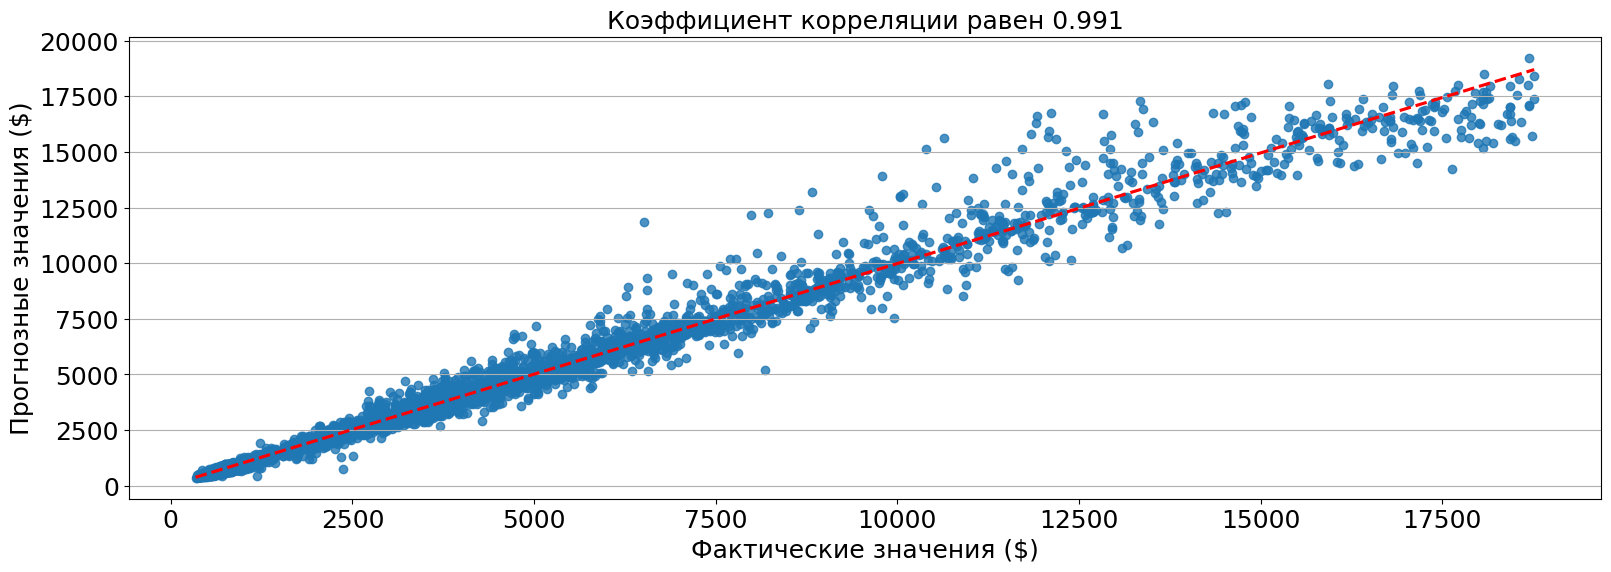

In [53]:
plot_regression(y_test.values, y_pred_test)

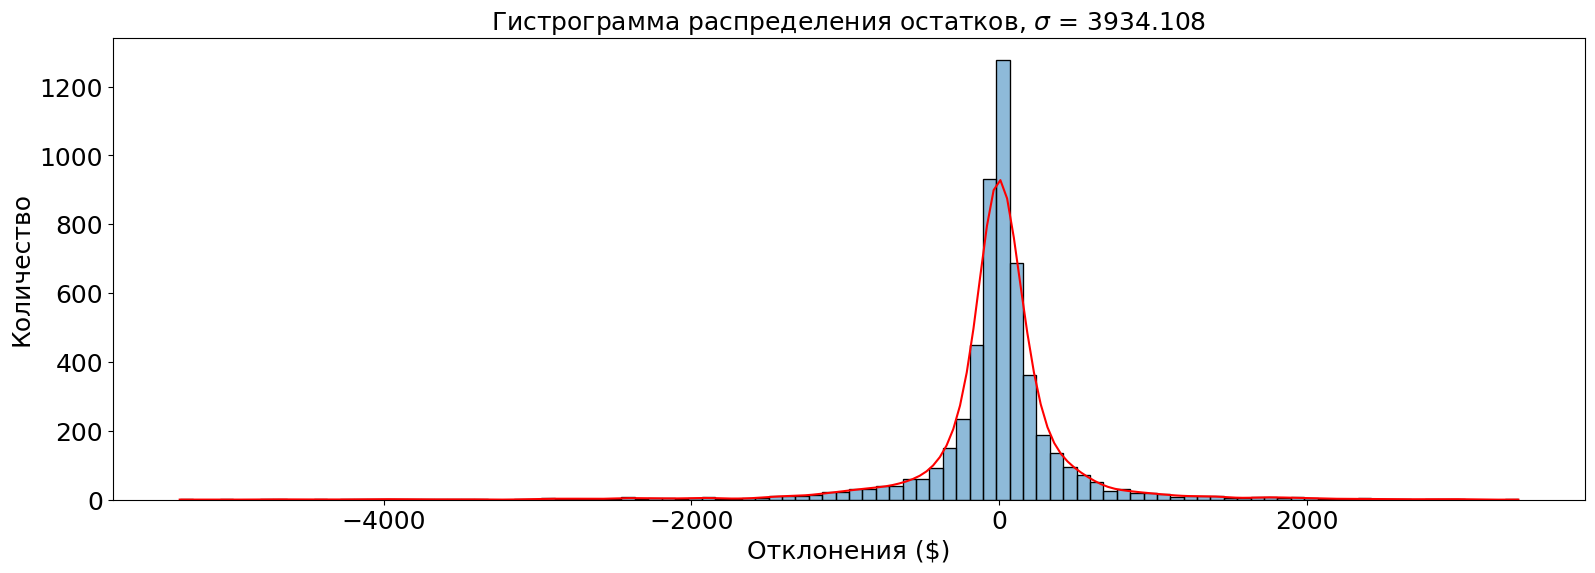

In [54]:
residuals_histogram(y_test, y_pred_test)

<h3>Выгрузка модели</h3>

In [34]:
model_new.fit(X, y)

,boosting_type,'gbdt'
,num_leaves,43
,max_depth,-1
,learning_rate,0.1
,n_estimators,780
,subsample_for_bin,200000
,objective,'mae'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
joblib.dump(model, "diamond.model")